In [1]:
from os import environ
environ['train_device'] = 'cuda:3' # training device: 'cpu' or 'cuda:X'
environ['store_device'] = 'cuda:3' # Data storing device:  'cpu' or 'cuda:X'

train_val_dataset_file = '/data/kk4796/datasets/dataset_13M_train_val.pkl' 
test_dataset_file = '/data/kk4796/datasets/dataset_13M_test.pkl'
benchmark_dataset_file ='/data/mm12191/datasets/benchmarks_ds2.json' 

# 1st model of Tiling

In [ ]:
%run utils_Tiling1_RLSTM.py # imports and defines some utils functions

### Load Data
<a id='load_data'></a>

In [2]:
# Data filtering
def filter_schedule(schedule_str): # needs to return True if we want the passed schedule to be dropped 
    
    regex = "T\d\([L\d,]+\)$"
    if re.search(regex, schedule_str): # drops all the schedules except the ones ending with tiling
        return True
    if schedule_str=="":
        return True
    return False

In [3]:
train_val_dataset, val_bl, val_indices, train_bl, train_indices = load_data(train_val_dataset_file,split_ratio=0.1, max_batch_size=2048, filter_func=filter_schedule)
test_dataset, test_bl, test_indices, _, _ = load_data(test_dataset_file,split_ratio=1, max_batch_size=2048, filter_func=filter_schedule)
bench_dataset, bench_bl, bench_indices, _, _ = load_data(benchmark_dataset_file,split_ratio=1, max_batch_size=2048, filter_func=filter_schedule)

loading data from  /data/kk4796/datasets/dataset_13M_train_val.pkl


100%|██████████| 89655/89655 [15:56<00:00, 93.75it/s]   


Number of batches 259
Number of batches dropped due to too much memory accesses:14306
Data loaded
Sizes: (25, 234) batches
loading data from  /data/kk4796/datasets/dataset_13M_test.pkl


100%|██████████| 9961/9961 [01:32<00:00, 108.07it/s]


Number of batches 31
Number of batches dropped due to too much memory accesses:1414
Data loaded
Sizes: (31, 0) batches
loading data from  /data/mm12191/datasets/benchmarks_ds2.json


100%|██████████| 30/30 [00:01<00:00, 29.68it/s]

Number of batches 3
Data loaded
Sizes: (3, 0) batches


### Define Model

In [4]:
input_size = 1272  # size of all the vectors

model = None 
model = Model_Recursive_LSTM_v2(input_size, comp_embed_layer_sizes=[600, 900, 600, 400, 200], drops=[0.275, 0.4, 0.275, 0.175, 0.175] , output_size=28)
model.to(train_device)

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(),weight_decay=0.375e-2)  

### Train

Epoch 1/1000:  train Loss: 165.6899   val Loss: 125.2343   time: 5.78s   best: 125.2343
Epoch 2/1000:  train Loss: 130.3229   val Loss: 121.8922   time: 1.91s   best: 121.8922
Epoch 3/1000:  train Loss: 126.2805   val Loss: 120.2010   time: 1.92s   best: 120.2010
Epoch 4/1000:  train Loss: 124.2409   val Loss: 118.7618   time: 1.92s   best: 118.7618
Epoch 5/1000:  train Loss: 122.5425   val Loss: 117.2907   time: 1.93s   best: 117.2907
Epoch 6/1000:  train Loss: 120.8894   val Loss: 115.6231   time: 1.93s   best: 115.6231
Epoch 7/1000:  train Loss: 118.8512   val Loss: 113.7113   time: 1.93s   best: 113.7113
Epoch 8/1000:  train Loss: 116.2696   val Loss: 110.3264   time: 1.92s   best: 110.3264
Epoch 9/1000:  train Loss: 112.2088   val Loss: 104.8340   time: 1.91s   best: 104.8340
Epoch 10/1000:  train Loss: 107.5028   val Loss: 99.8493   time: 1.90s   best: 99.8493
Epoch 11/1000:  train Loss: 103.7491   val Loss: 96.8911   time: 1.90s   best: 96.8911
Epoch 12/1000:  train Loss: 101.08

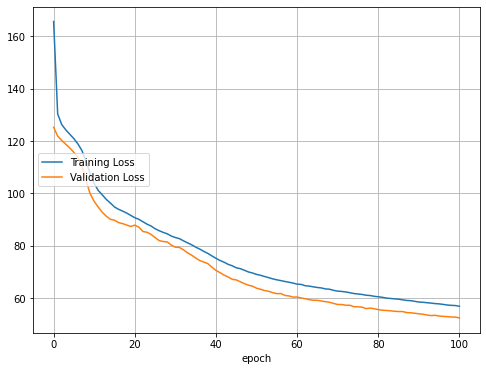

Epoch 102/1000:  train Loss: 56.6452   val Loss: 52.3278   time: 1.94s   best: 52.3278
Epoch 103/1000:  train Loss: 56.4468   val Loss: 52.0734   time: 1.94s   best: 52.0734
Epoch 104/1000:  train Loss: 56.1898   val Loss: 51.7178   time: 1.94s   best: 51.7178
Epoch 105/1000:  train Loss: 56.0689   val Loss: 51.6130   time: 1.94s   best: 51.6130
Epoch 106/1000:  train Loss: 56.0283   val Loss: 51.5755   time: 1.93s   best: 51.5755
Epoch 107/1000:  train Loss: 55.8110   val Loss: 51.3335   time: 1.92s   best: 51.3335
Epoch 108/1000:  train Loss: 55.7650   val Loss: 51.2122   time: 1.91s   best: 51.2122
Epoch 109/1000:  train Loss: 55.6111   val Loss: 51.1419   time: 1.90s   best: 51.1419
Epoch 110/1000:  train Loss: 55.4638   val Loss: 51.2195   time: 1.90s   best: 51.1419
Epoch 111/1000:  train Loss: 55.1751   val Loss: 50.7147   time: 1.90s   best: 50.7147
Epoch 112/1000:  train Loss: 55.1702   val Loss: 50.8041   time: 1.90s   best: 50.7147
Epoch 113/1000:  train Loss: 55.0232   val 

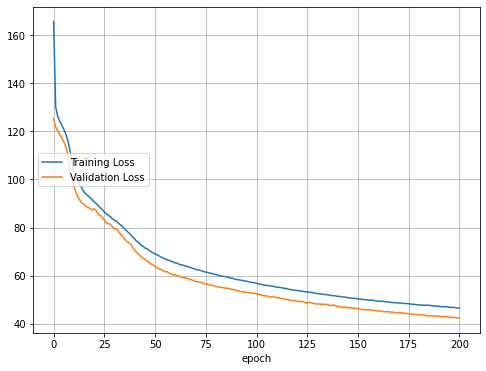

Epoch 202/1000:  train Loss: 46.5019   val Loss: 42.4004   time: 1.91s   best: 42.4004
Epoch 203/1000:  train Loss: 46.4663   val Loss: 42.2832   time: 1.92s   best: 42.2832
Epoch 204/1000:  train Loss: 46.3839   val Loss: 42.4237   time: 1.94s   best: 42.2832
Epoch 205/1000:  train Loss: 46.4970   val Loss: 42.2234   time: 1.95s   best: 42.2234
Epoch 206/1000:  train Loss: 46.3586   val Loss: 42.0166   time: 1.96s   best: 42.0166
Epoch 207/1000:  train Loss: 46.3357   val Loss: 42.0721   time: 1.95s   best: 42.0166
Epoch 208/1000:  train Loss: 46.2751   val Loss: 42.1738   time: 1.95s   best: 42.0166
Epoch 209/1000:  train Loss: 46.1262   val Loss: 42.0460   time: 1.95s   best: 42.0166
Epoch 210/1000:  train Loss: 46.0531   val Loss: 41.9556   time: 1.92s   best: 41.9556
Epoch 211/1000:  train Loss: 46.1359   val Loss: 41.8277   time: 1.93s   best: 41.8277
Epoch 212/1000:  train Loss: 45.9098   val Loss: 41.6275   time: 1.92s   best: 41.6275
Epoch 213/1000:  train Loss: 45.9354   val 

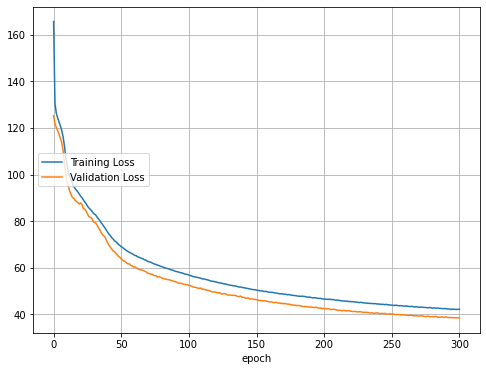

Epoch 302/1000:  train Loss: 42.0148   val Loss: 38.3691   time: 1.92s   best: 38.3691
Epoch 303/1000:  train Loss: 41.9668   val Loss: 38.3888   time: 1.91s   best: 38.3691
Epoch 304/1000:  train Loss: 42.0083   val Loss: 38.3382   time: 1.91s   best: 38.3382
Epoch 305/1000:  train Loss: 41.8123   val Loss: 38.1983   time: 1.90s   best: 38.1983
Epoch 306/1000:  train Loss: 41.9055   val Loss: 38.2017   time: 1.90s   best: 38.1983
Epoch 307/1000:  train Loss: 41.7738   val Loss: 38.2098   time: 1.92s   best: 38.1983
Epoch 308/1000:  train Loss: 41.8244   val Loss: 38.2164   time: 1.93s   best: 38.1983
Epoch 309/1000:  train Loss: 41.7524   val Loss: 38.4303   time: 1.94s   best: 38.1983
Epoch 310/1000:  train Loss: 41.6644   val Loss: 38.2074   time: 1.94s   best: 38.1983
Epoch 311/1000:  train Loss: 41.7161   val Loss: 38.0789   time: 1.95s   best: 38.0789
Epoch 312/1000:  train Loss: 41.7227   val Loss: 38.1702   time: 1.94s   best: 38.0789
Epoch 313/1000:  train Loss: 41.5249   val 

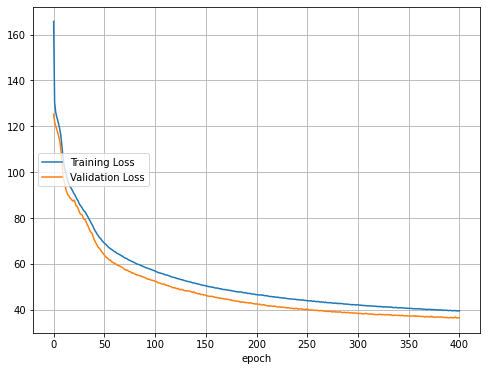

Epoch 402/1000:  train Loss: 39.3792   val Loss: 36.3776   time: 1.95s   best: 36.3776
Epoch 403/1000:  train Loss: 39.4872   val Loss: 36.3977   time: 1.95s   best: 36.3776
Epoch 404/1000:  train Loss: 39.4154   val Loss: 36.2098   time: 1.93s   best: 36.2098
Epoch 405/1000:  train Loss: 39.2695   val Loss: 36.2006   time: 1.92s   best: 36.2006
Epoch 406/1000:  train Loss: 39.4134   val Loss: 36.2731   time: 1.91s   best: 36.2006
Epoch 407/1000:  train Loss: 39.2595   val Loss: 36.4799   time: 1.91s   best: 36.2006
Epoch 408/1000:  train Loss: 39.4662   val Loss: 36.3119   time: 1.90s   best: 36.2006
Epoch 409/1000:  train Loss: 39.2200   val Loss: 36.3887   time: 1.91s   best: 36.2006
Epoch 410/1000:  train Loss: 39.1217   val Loss: 36.2533   time: 1.93s   best: 36.2006
Epoch 411/1000:  train Loss: 39.1546   val Loss: 36.0847   time: 1.94s   best: 36.0847
Epoch 412/1000:  train Loss: 39.1938   val Loss: 36.3059   time: 1.95s   best: 36.0847
Epoch 413/1000:  train Loss: 39.1763   val 

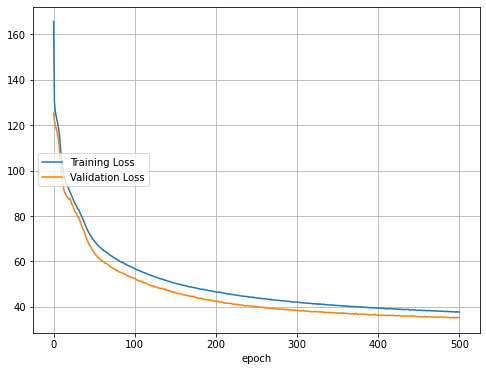

Epoch 502/1000:  train Loss: 37.7170   val Loss: 35.3253   time: 1.95s   best: 35.0973
Epoch 503/1000:  train Loss: 37.7309   val Loss: 35.1811   time: 1.96s   best: 35.0973
Epoch 504/1000:  train Loss: 37.7680   val Loss: 35.1786   time: 1.95s   best: 35.0973
Epoch 505/1000:  train Loss: 37.6382   val Loss: 35.3948   time: 1.95s   best: 35.0973
Epoch 506/1000:  train Loss: 37.6342   val Loss: 35.1674   time: 1.95s   best: 35.0973
Epoch 507/1000:  train Loss: 37.6570   val Loss: 35.2259   time: 1.93s   best: 35.0973
Epoch 508/1000:  train Loss: 37.6051   val Loss: 35.4201   time: 1.93s   best: 35.0973
Epoch 509/1000:  train Loss: 37.7376   val Loss: 35.1381   time: 1.92s   best: 35.0973
Epoch 510/1000:  train Loss: 37.5665   val Loss: 35.1868   time: 1.91s   best: 35.0973
Epoch 511/1000:  train Loss: 37.5674   val Loss: 35.0873   time: 1.91s   best: 35.0873
Epoch 512/1000:  train Loss: 37.5966   val Loss: 35.1776   time: 1.91s   best: 35.0873
Epoch 513/1000:  train Loss: 37.5013   val 

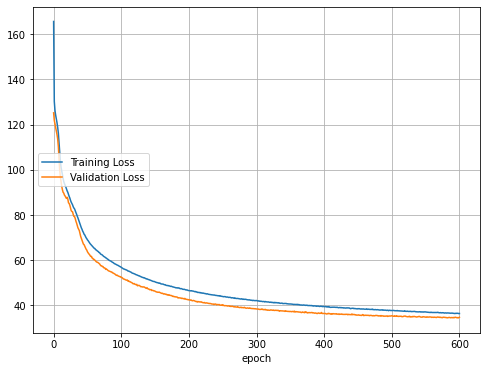

Epoch 602/1000:  train Loss: 36.4335   val Loss: 34.4307   time: 1.91s   best: 34.4155
Epoch 603/1000:  train Loss: 36.3437   val Loss: 34.4828   time: 1.90s   best: 34.4155
Epoch 604/1000:  train Loss: 36.2128   val Loss: 34.4305   time: 1.91s   best: 34.4155
Epoch 605/1000:  train Loss: 36.3867   val Loss: 34.3570   time: 1.93s   best: 34.3570
Epoch 606/1000:  train Loss: 36.2958   val Loss: 34.4787   time: 1.94s   best: 34.3570
Epoch 607/1000:  train Loss: 36.3633   val Loss: 34.6351   time: 1.95s   best: 34.3570
Epoch 608/1000:  train Loss: 36.2802   val Loss: 34.2991   time: 1.95s   best: 34.2991
Epoch 609/1000:  train Loss: 36.3599   val Loss: 34.4123   time: 1.94s   best: 34.2991
Epoch 610/1000:  train Loss: 36.2924   val Loss: 34.4831   time: 1.94s   best: 34.2991
Epoch 611/1000:  train Loss: 36.2694   val Loss: 34.6120   time: 1.93s   best: 34.2991
Epoch 612/1000:  train Loss: 36.2132   val Loss: 34.3917   time: 1.91s   best: 34.2991
Epoch 613/1000:  train Loss: 36.3196   val 

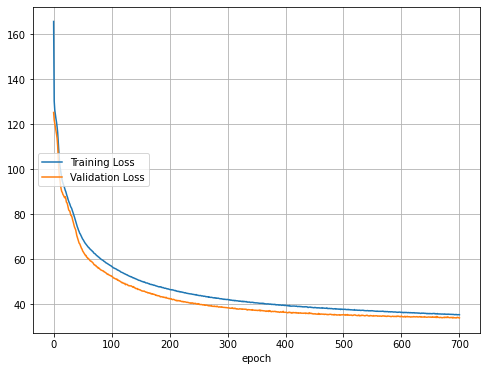

Epoch 702/1000:  train Loss: 35.2902   val Loss: 33.9641   time: 1.92s   best: 33.8857
Epoch 703/1000:  train Loss: 35.4353   val Loss: 34.2471   time: 1.93s   best: 33.8857
Epoch 704/1000:  train Loss: 35.3429   val Loss: 34.0908   time: 1.92s   best: 33.8857
Epoch 705/1000:  train Loss: 35.2109   val Loss: 34.1166   time: 1.91s   best: 33.8857
Epoch 706/1000:  train Loss: 35.3082   val Loss: 33.8142   time: 1.91s   best: 33.8142
Epoch 707/1000:  train Loss: 35.2735   val Loss: 33.9923   time: 1.91s   best: 33.8142
Epoch 708/1000:  train Loss: 35.2338   val Loss: 34.0651   time: 1.92s   best: 33.8142
Epoch 709/1000:  train Loss: 35.2197   val Loss: 34.1875   time: 1.94s   best: 33.8142
Epoch 710/1000:  train Loss: 35.3215   val Loss: 34.0346   time: 1.95s   best: 33.8142
Epoch 711/1000:  train Loss: 35.2174   val Loss: 34.0565   time: 1.96s   best: 33.8142
Epoch 712/1000:  train Loss: 35.2662   val Loss: 33.8232   time: 1.95s   best: 33.8142
Epoch 713/1000:  train Loss: 35.2424   val 

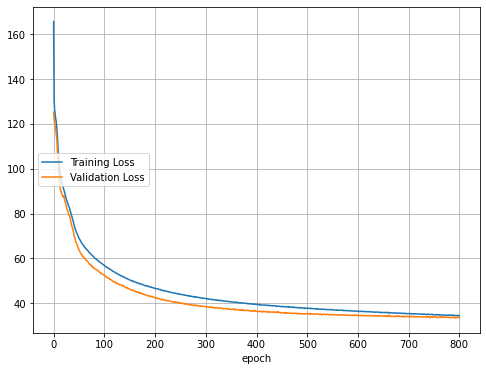

Epoch 802/1000:  train Loss: 34.3752   val Loss: 33.4815   time: 1.95s   best: 33.3904
Epoch 803/1000:  train Loss: 34.4227   val Loss: 33.5375   time: 1.95s   best: 33.3904
Epoch 804/1000:  train Loss: 34.3139   val Loss: 33.5917   time: 1.94s   best: 33.3904
Epoch 805/1000:  train Loss: 34.4094   val Loss: 33.6295   time: 1.94s   best: 33.3904
Epoch 806/1000:  train Loss: 34.4307   val Loss: 33.5983   time: 1.93s   best: 33.3904
Epoch 807/1000:  train Loss: 34.4188   val Loss: 33.4658   time: 1.92s   best: 33.3904
Epoch 808/1000:  train Loss: 34.3129   val Loss: 33.7611   time: 1.91s   best: 33.3904
Epoch 809/1000:  train Loss: 34.5171   val Loss: 33.7330   time: 1.91s   best: 33.3904
Epoch 810/1000:  train Loss: 34.3656   val Loss: 33.6101   time: 1.91s   best: 33.3904
Epoch 811/1000:  train Loss: 34.4646   val Loss: 33.7477   time: 1.91s   best: 33.3904
Epoch 812/1000:  train Loss: 34.2741   val Loss: 33.5933   time: 1.94s   best: 33.3904
Epoch 813/1000:  train Loss: 34.3065   val 

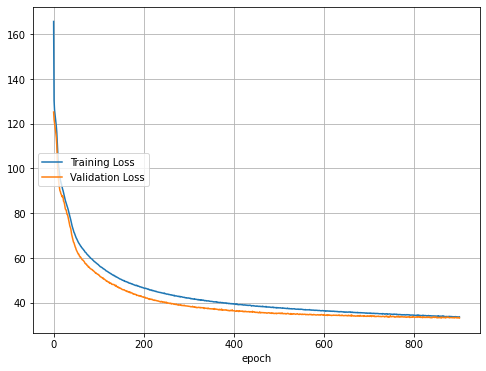

Epoch 902/1000:  train Loss: 33.5983   val Loss: 33.3268   time: 1.92s   best: 33.1983
Epoch 903/1000:  train Loss: 33.6732   val Loss: 33.2870   time: 1.93s   best: 33.1983
Epoch 904/1000:  train Loss: 33.7356   val Loss: 33.3028   time: 1.94s   best: 33.1983
Epoch 905/1000:  train Loss: 33.7279   val Loss: 33.3948   time: 1.94s   best: 33.1983
Epoch 906/1000:  train Loss: 33.6174   val Loss: 33.2950   time: 1.94s   best: 33.1983
Epoch 907/1000:  train Loss: 33.6509   val Loss: 33.5391   time: 1.94s   best: 33.1983
Epoch 908/1000:  train Loss: 33.7033   val Loss: 33.1954   time: 1.93s   best: 33.1954
Epoch 909/1000:  train Loss: 33.6773   val Loss: 33.1198   time: 1.93s   best: 33.1198
Epoch 910/1000:  train Loss: 33.5456   val Loss: 33.2253   time: 1.92s   best: 33.1198
Epoch 911/1000:  train Loss: 33.5810   val Loss: 33.2159   time: 1.91s   best: 33.1198
Epoch 912/1000:  train Loss: 33.6529   val Loss: 33.2197   time: 1.90s   best: 33.1198
Epoch 913/1000:  train Loss: 33.6201   val 

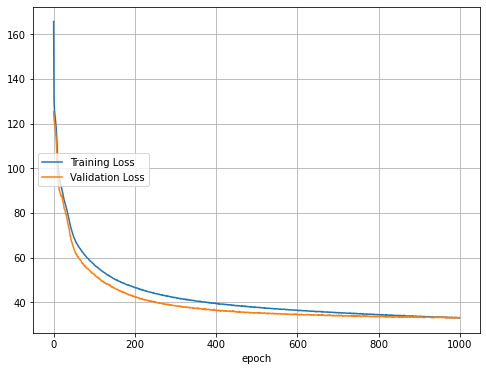

Training complete in 32m 11s   best validation loss: 32.9728


In [5]:
bl_dict={'train':train_bl, 'val':val_bl}
log_file = 'log_test1.txt'

losses, best_model = train_model(model, criterion, optimizer , max_lr=0.001, dataloader=bl_dict,
                                 num_epochs=1000, logFile=log_file, log_every=500)

### Results 

In [6]:
def accuracy(df):
    from sklearn.metrics import accuracy_score
    return accuracy_score(df['target'].values.tolist(), df['prediction'].values.tolist())*100

def report(df):
    from sklearn.metrics import classification_report
    print(classification_report(df['target'].values.tolist(), df['prediction'].values.tolist(), zero_division=1))

In [45]:
val_df = get_results_df(train_val_dataset, val_bl, val_indices, model)
test_df = get_results_df(test_dataset, test_bl, test_indices, model)
train_df = get_results_df(train_val_dataset, train_bl, train_indices, model)
benchmark_df = get_results_df(bench_dataset, bench_bl, bench_indices, model)

100%|██████████| 3/3 [00:00<00:00, 81.15it/s]


### Save model

In [37]:
torch.save(model.state_dict(), 'Models/1stModel_final.pkl')

### Load model

## Other metrics

In [18]:
report(train_df)
report(val_df)
report(test_df)
report(benchmark_df)

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     99058
           1       0.87      0.91      0.89    166814
           2       0.90      0.94      0.92    189964
           3       0.81      0.84      0.82     16678
           4       0.76      0.93      0.84      1034
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         0
           7       1.00      1.00      1.00         0
           8       1.00      1.00      1.00         0
           9       1.00      1.00      1.00         0
          10       1.00      1.00      1.00         0
          11       1.00      1.00      1.00         0
          12       1.00      1.00      1.00         0
          13       1.00      1.00      1.00         0
          14       1.00      1.00      1.00         0
          15       1.00      1.00      1.00         0
          16       1.00      1.00      1.00         0
          17       1.00    

## 

# 2nd model of Tiling

In [19]:
%run utils_Tiling2_RLSTM.py

### Load Data
<a id='load_data'></a>

In [20]:
train_val_dataset2, val_bl2, val_indices2, train_bl2, train_indices2 = load_data(train_val_dataset_file,split_ratio=0.1, max_batch_size=2048, filter_func=filter_schedule)
test_dataset2, test_bl2, test_indices2, _, _ = load_data(test_dataset_file,split_ratio=1, max_batch_size=2048, filter_func=filter_schedule)
bench_dataset2, bench_bl2, bench_indices2, _, _ = load_data(benchmark_dataset_file,split_ratio=1, max_batch_size=2048, filter_func=filter_schedule)

loading data from  /data/kk4796/datasets/dataset_13M_train_val.pkl


100%|██████████| 89655/89655 [1:19:02<00:00, 18.90it/s]  


Number of batches 439
Number of batches dropped due to too much memory accesses:23259
Data loaded
Sizes: (43, 396) batches
loading data from  /data/kk4796/datasets/dataset_13M_test.pkl


100%|██████████| 9961/9961 [08:46<00:00, 18.94it/s]  


Number of batches 51
Number of batches dropped due to too much memory accesses:2301
Data loaded
Sizes: (51, 0) batches
loading data from  /data/mm12191/datasets/benchmarks_ds2.json


100%|██████████| 30/30 [00:08<00:00,  3.70it/s]

Number of batches 3
Data loaded
Sizes: (3, 0) batches


### Define Model

In [26]:
input_size = 1272  # size of all the vectors

model2 = None 
model2 = Model_Recursive_LSTM_v2(input_size, comp_embed_layer_sizes=[600, 900, 600, 400, 200], drops=[0.4, 0.4, 0.4, 0.4, 0.4], output_size=37)
model2.to(train_device)

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model2.parameters(),weight_decay=0.375e-2)  

### Train

Epoch 1/1000:  train Loss: 194.1422   val Loss: 143.1295   time: 3.26s   best: 143.1295
Epoch 2/1000:  train Loss: 141.3739   val Loss: 128.7233   time: 3.27s   best: 128.7233
Epoch 3/1000:  train Loss: 130.1529   val Loss: 123.0331   time: 3.37s   best: 123.0331
Epoch 4/1000:  train Loss: 126.0590   val Loss: 121.5166   time: 3.35s   best: 121.5166
Epoch 5/1000:  train Loss: 124.1078   val Loss: 120.7681   time: 3.30s   best: 120.7681
Epoch 6/1000:  train Loss: 122.8439   val Loss: 120.2498   time: 3.26s   best: 120.2498
Epoch 7/1000:  train Loss: 121.8940   val Loss: 119.7816   time: 3.26s   best: 119.7816
Epoch 8/1000:  train Loss: 121.0365   val Loss: 119.4886   time: 3.25s   best: 119.4886
Epoch 9/1000:  train Loss: 120.4734   val Loss: 119.2723   time: 3.25s   best: 119.2723
Epoch 10/1000:  train Loss: 119.8922   val Loss: 118.9013   time: 3.29s   best: 118.9013
Epoch 11/1000:  train Loss: 119.3966   val Loss: 118.8237   time: 3.37s   best: 118.8237
Epoch 12/1000:  train Loss: 11

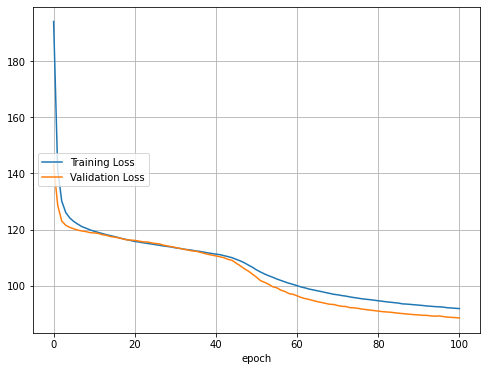

Epoch 102/1000:  train Loss: 91.6910   val Loss: 88.3907   time: 3.42s   best: 88.3907
Epoch 103/1000:  train Loss: 91.6169   val Loss: 88.3274   time: 3.44s   best: 88.3274
Epoch 104/1000:  train Loss: 91.5155   val Loss: 88.1581   time: 3.55s   best: 88.1581
Epoch 105/1000:  train Loss: 91.4002   val Loss: 88.0934   time: 3.55s   best: 88.0934
Epoch 106/1000:  train Loss: 91.2976   val Loss: 88.0842   time: 3.44s   best: 88.0842
Epoch 107/1000:  train Loss: 91.2086   val Loss: 87.9314   time: 3.43s   best: 87.9314
Epoch 108/1000:  train Loss: 91.1317   val Loss: 87.9340   time: 3.43s   best: 87.9314
Epoch 109/1000:  train Loss: 90.9061   val Loss: 87.7967   time: 3.41s   best: 87.7967
Epoch 110/1000:  train Loss: 90.9106   val Loss: 87.6000   time: 3.42s   best: 87.6000
Epoch 111/1000:  train Loss: 90.7859   val Loss: 87.7542   time: 3.52s   best: 87.6000
Epoch 112/1000:  train Loss: 90.6883   val Loss: 87.4763   time: 3.56s   best: 87.4763
Epoch 113/1000:  train Loss: 90.5798   val 

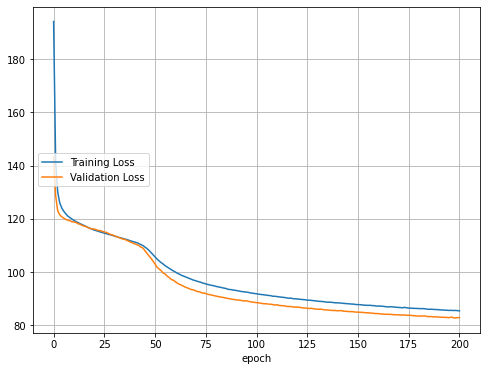

Epoch 202/1000:  train Loss: 85.5043   val Loss: 82.7853   time: 3.43s   best: 82.7537
Epoch 203/1000:  train Loss: 85.3689   val Loss: 82.7634   time: 3.42s   best: 82.7537
Epoch 204/1000:  train Loss: 85.3488   val Loss: 82.7102   time: 3.43s   best: 82.7102
Epoch 205/1000:  train Loss: 85.2960   val Loss: 82.6031   time: 3.54s   best: 82.6031
Epoch 206/1000:  train Loss: 85.2652   val Loss: 82.6123   time: 3.56s   best: 82.6031
Epoch 207/1000:  train Loss: 85.2921   val Loss: 82.7435   time: 3.47s   best: 82.6031
Epoch 208/1000:  train Loss: 85.2700   val Loss: 82.6105   time: 3.44s   best: 82.6031
Epoch 209/1000:  train Loss: 85.2507   val Loss: 82.5869   time: 3.44s   best: 82.5869
Epoch 210/1000:  train Loss: 85.1717   val Loss: 82.5820   time: 3.42s   best: 82.5820
Epoch 211/1000:  train Loss: 85.2128   val Loss: 82.5729   time: 3.42s   best: 82.5729
Epoch 212/1000:  train Loss: 85.1900   val Loss: 82.4662   time: 3.48s   best: 82.4662
Epoch 213/1000:  train Loss: 85.0983   val 

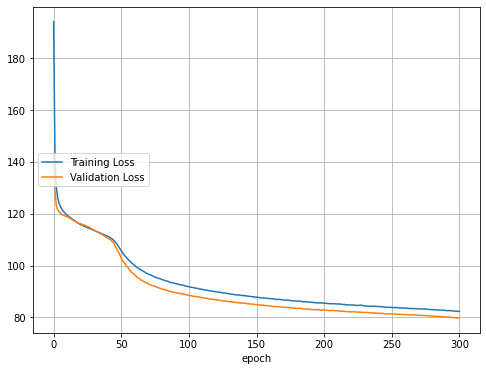

Epoch 302/1000:  train Loss: 82.3341   val Loss: 79.7347   time: 3.44s   best: 79.7347
Epoch 303/1000:  train Loss: 82.2472   val Loss: 79.8365   time: 3.44s   best: 79.7347
Epoch 304/1000:  train Loss: 82.2871   val Loss: 79.6672   time: 3.43s   best: 79.6672
Epoch 305/1000:  train Loss: 82.2078   val Loss: 79.6374   time: 3.42s   best: 79.6374
Epoch 306/1000:  train Loss: 82.0830   val Loss: 79.5593   time: 3.48s   best: 79.5593
Epoch 307/1000:  train Loss: 82.1400   val Loss: 79.5013   time: 3.58s   best: 79.5013
Epoch 308/1000:  train Loss: 82.0447   val Loss: 79.5544   time: 3.53s   best: 79.5013
Epoch 309/1000:  train Loss: 82.1189   val Loss: 79.5657   time: 3.44s   best: 79.5013
Epoch 310/1000:  train Loss: 82.0058   val Loss: 79.4595   time: 3.45s   best: 79.4595
Epoch 311/1000:  train Loss: 81.9367   val Loss: 79.3517   time: 3.42s   best: 79.3517
Epoch 312/1000:  train Loss: 82.0176   val Loss: 79.4728   time: 3.42s   best: 79.3517
Epoch 313/1000:  train Loss: 81.9239   val 

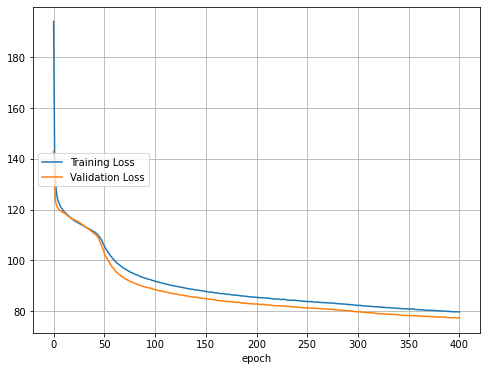

Epoch 402/1000:  train Loss: 79.6516   val Loss: 77.4229   time: 3.45s   best: 77.3385
Epoch 403/1000:  train Loss: 79.7074   val Loss: 77.4100   time: 3.43s   best: 77.3385
Epoch 404/1000:  train Loss: 79.6236   val Loss: 77.2444   time: 3.42s   best: 77.2444
Epoch 405/1000:  train Loss: 79.7014   val Loss: 77.3247   time: 3.41s   best: 77.2444
Epoch 406/1000:  train Loss: 79.6049   val Loss: 77.2380   time: 3.41s   best: 77.2380
Epoch 407/1000:  train Loss: 79.5772   val Loss: 77.2768   time: 3.49s   best: 77.2380
Epoch 408/1000:  train Loss: 79.6523   val Loss: 77.3319   time: 3.57s   best: 77.2380
Epoch 409/1000:  train Loss: 79.6521   val Loss: 77.2585   time: 3.49s   best: 77.2380
Epoch 410/1000:  train Loss: 79.5041   val Loss: 77.2530   time: 3.43s   best: 77.2380
Epoch 411/1000:  train Loss: 79.4711   val Loss: 77.2187   time: 3.43s   best: 77.2187
Epoch 412/1000:  train Loss: 79.5256   val Loss: 77.1738   time: 3.41s   best: 77.1738
Epoch 413/1000:  train Loss: 79.4646   val 

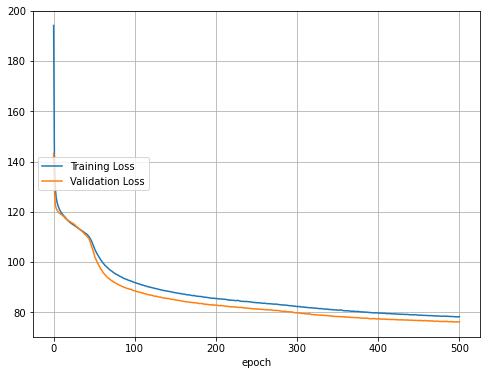

Epoch 502/1000:  train Loss: 78.2029   val Loss: 76.1071   time: 3.55s   best: 76.1071
Epoch 503/1000:  train Loss: 78.0922   val Loss: 76.1241   time: 3.44s   best: 76.1071
Epoch 504/1000:  train Loss: 78.0608   val Loss: 76.2180   time: 3.43s   best: 76.1071
Epoch 505/1000:  train Loss: 78.1274   val Loss: 75.9681   time: 3.42s   best: 75.9681
Epoch 506/1000:  train Loss: 78.0662   val Loss: 75.9966   time: 3.41s   best: 75.9681
Epoch 507/1000:  train Loss: 78.0138   val Loss: 76.0185   time: 3.42s   best: 75.9681
Epoch 508/1000:  train Loss: 78.0871   val Loss: 76.0094   time: 3.52s   best: 75.9681
Epoch 509/1000:  train Loss: 78.0431   val Loss: 75.8700   time: 3.56s   best: 75.8700
Epoch 510/1000:  train Loss: 78.0066   val Loss: 76.0254   time: 3.47s   best: 75.8700
Epoch 511/1000:  train Loss: 78.0050   val Loss: 75.9901   time: 3.42s   best: 75.8700
Epoch 512/1000:  train Loss: 78.0538   val Loss: 76.0086   time: 3.42s   best: 75.8700
Epoch 513/1000:  train Loss: 78.0381   val 

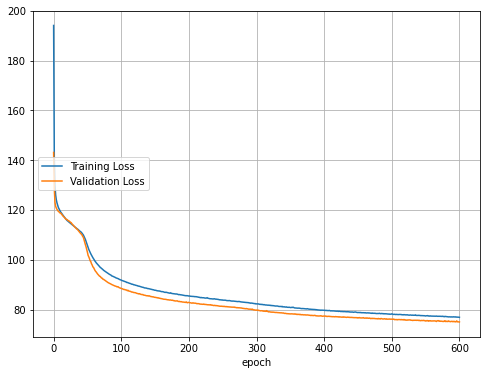

Epoch 602/1000:  train Loss: 76.9487   val Loss: 74.9840   time: 3.56s   best: 74.9840
Epoch 603/1000:  train Loss: 76.9346   val Loss: 75.1019   time: 3.55s   best: 74.9840
Epoch 604/1000:  train Loss: 76.9620   val Loss: 75.2385   time: 3.44s   best: 74.9840
Epoch 605/1000:  train Loss: 76.9037   val Loss: 75.1818   time: 3.43s   best: 74.9840
Epoch 606/1000:  train Loss: 76.9020   val Loss: 75.0360   time: 3.42s   best: 74.9840
Epoch 607/1000:  train Loss: 76.9379   val Loss: 75.0767   time: 3.41s   best: 74.9840
Epoch 608/1000:  train Loss: 76.8532   val Loss: 75.0090   time: 3.42s   best: 74.9840
Epoch 609/1000:  train Loss: 76.8146   val Loss: 74.9804   time: 3.53s   best: 74.9804
Epoch 610/1000:  train Loss: 76.8555   val Loss: 74.9849   time: 3.56s   best: 74.9804
Epoch 611/1000:  train Loss: 76.7662   val Loss: 75.2360   time: 3.47s   best: 74.9804
Epoch 612/1000:  train Loss: 76.7560   val Loss: 75.1143   time: 3.43s   best: 74.9804
Epoch 613/1000:  train Loss: 76.8003   val 

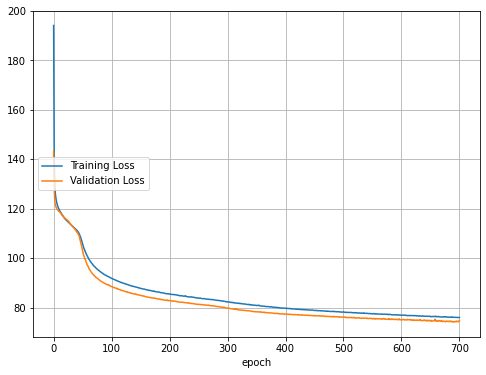

Epoch 702/1000:  train Loss: 75.9857   val Loss: 74.2472   time: 3.43s   best: 74.1778
Epoch 703/1000:  train Loss: 75.9661   val Loss: 74.2138   time: 3.54s   best: 74.1778
Epoch 704/1000:  train Loss: 75.9327   val Loss: 74.2056   time: 3.56s   best: 74.1778
Epoch 705/1000:  train Loss: 76.0043   val Loss: 74.3896   time: 3.45s   best: 74.1778
Epoch 706/1000:  train Loss: 75.9917   val Loss: 74.5312   time: 3.44s   best: 74.1778
Epoch 707/1000:  train Loss: 76.0256   val Loss: 74.2073   time: 3.43s   best: 74.1778
Epoch 708/1000:  train Loss: 75.9162   val Loss: 74.1335   time: 3.41s   best: 74.1335
Epoch 709/1000:  train Loss: 75.8650   val Loss: 74.1151   time: 3.41s   best: 74.1151
Epoch 710/1000:  train Loss: 75.9144   val Loss: 74.3700   time: 3.50s   best: 74.1151
Epoch 711/1000:  train Loss: 75.9039   val Loss: 74.3080   time: 3.57s   best: 74.1151
Epoch 712/1000:  train Loss: 75.8576   val Loss: 74.2199   time: 3.49s   best: 74.1151
Epoch 713/1000:  train Loss: 75.8858   val 

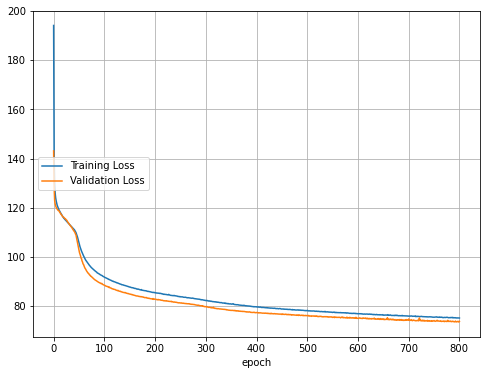

Epoch 802/1000:  train Loss: 75.2242   val Loss: 73.6350   time: 3.42s   best: 73.5687
Epoch 803/1000:  train Loss: 75.1513   val Loss: 73.7108   time: 3.42s   best: 73.5687
Epoch 804/1000:  train Loss: 75.1922   val Loss: 73.8288   time: 3.51s   best: 73.5687
Epoch 805/1000:  train Loss: 75.1846   val Loss: 73.6496   time: 3.57s   best: 73.5687
Epoch 806/1000:  train Loss: 75.1473   val Loss: 73.5429   time: 3.49s   best: 73.5429
Epoch 807/1000:  train Loss: 75.1691   val Loss: 73.6535   time: 3.43s   best: 73.5429
Epoch 808/1000:  train Loss: 75.1445   val Loss: 73.5958   time: 3.43s   best: 73.5429
Epoch 809/1000:  train Loss: 75.2006   val Loss: 73.5564   time: 3.41s   best: 73.5429
Epoch 810/1000:  train Loss: 75.1101   val Loss: 73.5600   time: 3.41s   best: 73.5429
Epoch 811/1000:  train Loss: 75.1208   val Loss: 73.6549   time: 3.45s   best: 73.5429
Epoch 812/1000:  train Loss: 75.0834   val Loss: 73.5205   time: 3.57s   best: 73.5205
Epoch 813/1000:  train Loss: 75.0883   val 

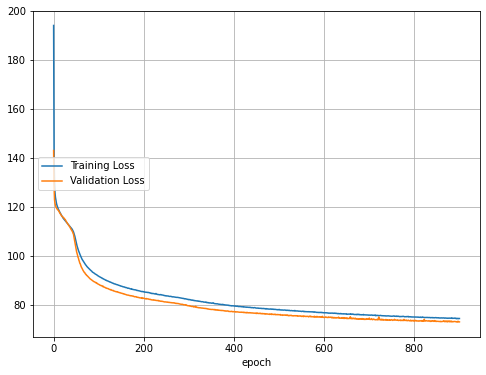

Epoch 902/1000:  train Loss: 74.6913   val Loss: 73.2527   time: 3.44s   best: 73.1733
Epoch 903/1000:  train Loss: 74.5591   val Loss: 73.3303   time: 3.42s   best: 73.1733
Epoch 904/1000:  train Loss: 74.5115   val Loss: 73.1260   time: 3.42s   best: 73.1260
Epoch 905/1000:  train Loss: 74.5370   val Loss: 73.2167   time: 3.45s   best: 73.1260
Epoch 906/1000:  train Loss: 74.6096   val Loss: 73.5978   time: 3.58s   best: 73.1260
Epoch 907/1000:  train Loss: 74.4933   val Loss: 73.2142   time: 3.53s   best: 73.1260
Epoch 908/1000:  train Loss: 74.5462   val Loss: 73.2443   time: 3.44s   best: 73.1260
Epoch 909/1000:  train Loss: 74.5388   val Loss: 73.2361   time: 3.44s   best: 73.1260
Epoch 910/1000:  train Loss: 74.4495   val Loss: 73.1070   time: 3.42s   best: 73.1070
Epoch 911/1000:  train Loss: 74.4632   val Loss: 73.2277   time: 3.42s   best: 73.1070
Epoch 912/1000:  train Loss: 74.4940   val Loss: 73.2650   time: 3.42s   best: 73.1070
Epoch 913/1000:  train Loss: 74.4571   val 

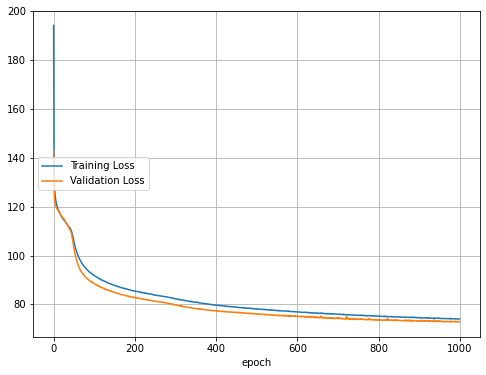

Training complete in 57m 42s   best validation loss: 72.8289


In [27]:
bl_dict={'train':train_bl2, 'val':val_bl2}
log_file = 'log_test2.txt'

losses, best_model = train_model(model2, criterion, optimizer , max_lr=0.001, dataloader=bl_dict,
                                 num_epochs=1000, logFile=log_file, log_every=500)

### Results 

In [46]:
%run utils_Tiling2_RLSTM.py
val_df2 = get_results_df(train_val_dataset2, val_bl2, val_indices2, model2)
test_df2 = get_results_df(test_dataset2, test_bl2, test_indices2, model2)
train_df2 = get_results_df(train_val_dataset2, train_bl2, train_indices2, model2)
benchmark_df2 = get_results_df(bench_dataset2, bench_bl2, bench_indices2, model2)

100%|██████████| 3/3 [00:00<00:00, 63.60it/s]


## Other metrics

In [48]:
report(train_df2)
report(val_df2)
report(test_df2)
report(benchmark_df2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270724
           1       0.75      0.63      0.69    160708
           2       0.54      0.25      0.34     47769
           3       0.41      0.68      0.51     35923
           4       0.55      0.34      0.42     87262
           5       0.40      0.22      0.28     25977
           6       0.46      0.27      0.34     17516
           7       0.50      0.89      0.64    113715
           8       0.56      0.32      0.41     27751
           9       0.46      0.54      0.50     19359
          10       1.00      1.00      1.00         0
          11       1.00      1.00      1.00         0
          12       1.00      1.00      1.00         0
          13       1.00      1.00      1.00         0
          14       1.00      1.00      1.00         0
          15       1.00      1.00      1.00         0
          16       1.00      1.00      1.00         0
          17       1.00    

### Save model

In [ ]:
torch.save(model2.state_dict(), 'Models/2ndModel_final_correct.pkl')

## 

# Evaluation of the models

## Load models

In [44]:
model.load_state_dict(torch.load('Models/1stModel_final.pkl',map_location=train_device))
model.to(train_device)
print()

model2.load_state_dict(torch.load('Models/2ndModel_final_correct.pkl',map_location=train_device))
model2.to(train_device)
print()

In [47]:
results1 = { 'Modèle' : '1er modèle du tiling',
            'Ensemble d\'entraînement' : accuracy(train_df), 
           "Ensemble de validation" : accuracy(val_df), 
           "Ensemble de tests" : accuracy(test_df), 
           "Benchmark" : accuracy(benchmark_df)}

results2 = { 'Modèle' : '2eme modèle du tiling',
            'Ensemble d\'entraînement' : accuracy(train_df2), 
           "Ensemble de validation" : accuracy(val_df2), 
           "Ensemble de tests" : accuracy(test_df2), 
           "Benchmark" : accuracy(benchmark_df2)}

df_results = pd.DataFrame(columns = ["Modèle", "Ensemble d'entraînement", "Ensemble de validation", "Ensemble de tests", "Benchmark"])
df_results = df_results.append(results1, ignore_index=True)
df_results = df_results.append(results2, ignore_index=True)
df_results

,Modèle,Ensemble d'entraînement,Ensemble de validation,Ensemble de tests,Benchmark
0,1er modèle du tiling,87.246915,85.556641,85.636398,61.756374
1,2eme modèle du tiling,70.566032,69.194838,69.440282,59.414991


In [37]:
benchmark_df[benchmark_df['name']=="function_blur_MEDIUM"]

,name,exec_time,sched_name,prediction,target
62,function_blur_MEDIUM,0.114715,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
63,function_blur_MEDIUM,0.059773,4,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
64,function_blur_MEDIUM,0.170854,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
65,function_blur_MEDIUM,0.219145,6,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
66,function_blur_MEDIUM,0.148901,58,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
67,function_blur_MEDIUM,0.343682,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
68,function_blur_MEDIUM,23.858101,60,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
69,function_blur_MEDIUM,0.193101,59,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
70,function_blur_MEDIUM,0.151040,85,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71,function_blur_MEDIUM,0.373147,3,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [39]:
benchmark_df2[benchmark_df2['prog_name']=="function_blur_MEDIUM"]

,prog_name,exec_time,sched_name,prediction,target
67,function_blur_MEDIUM,0.114715,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
68,function_blur_MEDIUM,0.059773,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
69,function_blur_MEDIUM,0.114715,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
70,function_blur_MEDIUM,0.170854,5,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71,function_blur_MEDIUM,0.219145,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
72,function_blur_MEDIUM,0.148901,58,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
73,function_blur_MEDIUM,0.343682,2,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
74,function_blur_MEDIUM,23.858101,60,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
75,function_blur_MEDIUM,0.193101,59,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
76,function_blur_MEDIUM,0.151040,85,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
